In [1]:
import neuro_lib    # Импорт своей библиотеки для работы с Neuro обработкой файлов

file = [r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_2\0-2020-12_03_00-40-11.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_2\1-2020-12_03_12-41-23.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_2\2-2020-12_04_00-42-36.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_2\3-2020-12_04_12-43-47.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_2\4-2020-12_05_00-44-59.txt"]


param_str = [3.3, 68000] # Параметры структуры: V(В) пит., R(Ом) доп.

[neuro_lib.replace(i) for i in file]
[neuro_lib.replace(j, '         ', '\t') for j in file]
print (param_str)

[3.3, 68000]


In [2]:
import neuro_lib_2
i = 0
res_on_off = [neuro_lib_2.on_off_impulse(i) for i in file]
for j in range(0,4):
    print (res_on_off[j].head().to_string())

   N on_start_t on_start_V on_end_t  on_end_V off_start_t off_start_V off_end_t off_end_V
0  0        NaN        NaN      NaN       NaN         NaN         NaN    10.007   0.01525
1  1     10.523   0.015875    10.62  0.018125      10.642    0.018125    12.538  0.016625
2  2     12.571   0.017375   12.671  0.019125      12.691    0.018625    14.597   0.01725
3  3     14.628    0.01875    14.73  0.020375      14.752      0.0195    16.661  0.018375
4  4     16.693   0.019375   16.793     0.021      16.815    0.020375    18.717  0.018875
   N on_start_t on_start_V on_end_t  on_end_V off_start_t off_start_V off_end_t off_end_V
0  0        NaN        NaN      NaN       NaN         NaN         NaN    10.005  0.018875
1  1     10.521     0.0205   11.016  0.025875      11.038     0.02525    12.538  0.023375
2  2      12.57    0.02475   13.062  0.029125      13.084    0.028125    14.579  0.026875
3  3     14.609    0.02775   15.112  0.032125      15.133      0.0315    16.639   0.02975
4  4     1

In [3]:
import pandas as pd
import numpy as np
data = [pd.read_csv(i, header=None, sep = "\t") for i in file]
#data_V[1][2] = pd.Series()
#data_V[1][2] = pd.Series(0, index=data_V[1].index)         # можно по индекса менять значения
# for i in range(0, len(data)):
#     data[i][2] = 1/((param_str[0] - data[i][1])*param_str[1]/data[i][1]) # не хватает разрядности для преобразования в S
for j in range(0,5):
    print (data[j].head().to_string())
print (len(data))

      0         1
0     6  0.014875
1   506  0.015000
2  1007  0.014875
3  1507  0.015125
4  2007  0.014875
      0         1
0     5  0.019125
1   505  0.018875
2  1005  0.018750
3  1505  0.018625
4  2005  0.019000
      0         1
0     5  0.029625
1   506  0.029625
2  1006  0.029625
3  1506  0.029500
4  2006  0.029500
      0         1
0     6  0.041875
1   507  0.041625
2  1007  0.041750
3  1507  0.041875
4  2007  0.041750
      0         1
0     5  0.051375
1   505  0.051875
2  1005  0.052125
3  1505  0.051625
4  2005  0.051500
5


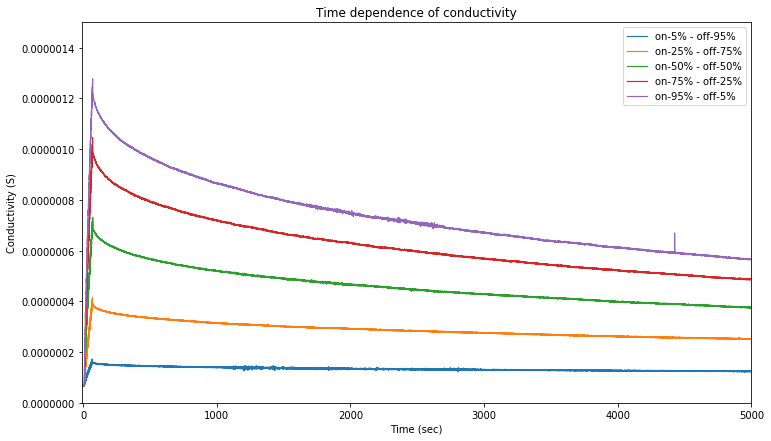

In [36]:
import matplotlib.pyplot as plt

x = list(data[0][0])
y = list(data[0][1])

popravka = [0,
            -0.000000015,
            -0.000000062,
            -0.00000012,
            -0.000000165]
popravka_2 = [1,
            1,
            1,
            1,
            1]

for i in range(0, len(data)):
    x[i] = list(data[i][0]/1000)
    y[i] = (1/((param_str[0] - data[i][1])*param_str[1]/data[i][1]))*popravka_2[i] + popravka[i]

My_lable = ['on-5% - off-95%',
            'on-25% - off-75%',
            'on-50% - off-50%',
            'on-75% - off-25%',
            'on-95% - off-5%']

plt.figure(figsize=(12, 7))
plt.title("Time dependence of conductivity")
for i in range(0, len(data)):
    plt.plot(x[i], y[i] , linewidth = 1.2, label = My_lable[i])
plt.legend()
plt.xlabel("Time (sec)")
plt.ylabel("Conductivity (S)")
#plt.axis([-10, 50, 0, 0.0000004])
plt.axis([-10, 5000, 0, 0.0000015])

plt.show()